#### A1: Research Question
My research question:
How can customer segmentation based on service usage patterns, monthly charges, and bandwidth usage reveal distinct groups for targeted engagement strategies?

This question guides our exploration into the dataset, aiming to uncover natural clusters within the customer base. By focusing on service usage metrics, I seek to understand how different customer behaviors and spending patterns can inform more personalized engagement efforts.

#### A2: Goal of the Data Analysis

The primary goal of this analysis is to segment the customer base into distinct groups based on quantifiable service usage metrics. For example Tenure, MonthlyCharges, and Bandwidth_GB_Year. This segmentation will facilitate the development of customized marketing and retention strategies by shedding light on the unique characteristics and needs of each customer group. By achieving a deeper understanding of our customer segments, we can enhance engagement, reduce churn, and improve overall satisfaction.

#### B1: Analysis Explanation with Expected Outcomes

* Analysis

The k-means clustering technique is chosen for its efficiency and effectiveness in grouping data into clusters based on feature similarity. In the context of the selected data set, k-means will analyze the continuous variables such as Tenure, MonthlyCharges, and Bandwidth_GB_Year to identify inherent groupings among customers. The algorithm iterates through the data, assigning each point to the nearest cluster centroid based on Euclidean distance, then recalculates the centroids until the assignment of points to clusters no longer changes significantly.

* Expected Outcomes

The expected outcome is the identification of distinct customer segments that share similar characteristics in terms of service usage and spending patterns. For example, one cluster might represent long-term customers with high bandwidth usage and monthly charges, indicating high engagement and potentially higher loyalty. Another cluster could represent newer customers with lower usage and charges, potentially at a higher risk of churn. These insights will enable targeted marketing and retention strategies tailored to each segment's needs and behaviors.

Analytics Vidhya. (2021, January)

#### B2: Assumption of the Clustering Technique

One fundamental assumption of the k-means clustering technique is that the clusters are spherical and of similar size. This assumption means the technique expects the variance of the distribution of each variable to be the same for all clusters, and that points are equally likely to be in all directions from the center. This can impact the performance of k-means on data with clusters of different sizes and densities.

Scikit-learn developers. (n.d.). K-means. Scikit-learn: Machine Learning in Python.

#### B3: Packages or Libraries for Python

* NumPy: Provides support for efficient operations on large multi-dimensional arrays and matrices, which is essential for handling the dataset and performing calculations for k-means clustering.

* Pandas: Useful for data manipulation and analysis. It offers data structures and operations for manipulating numerical tables and time series, crucial for preprocessing the dataset before clustering.

* Scikit-learn (sklearn): A key library for machine learning and data mining tasks. It includes a robust implementation of the k-means clustering algorithm, along with utilities for pre-processing data, evaluating models, and selecting parameters. Scikit-learn will be used to perform the clustering and analyze the characteristics of each customer segment.

* Matplotlib and Seaborn: These libraries are used for data visualization, which is crucial for interpreting the results of the k-means clustering. They will help visualize the clusters and their characteristics, making it easier to understand the segmentation and derive insights.

#### C1: Data Preprocessing Goal

One crucial data preprocessing goal for clustering using k-means is to standardize or normalize the continuous variables in the dataset. Since k-means clustering uses Euclidean distance to assign points to clusters, variables with larger scales can disproportionately influence the clustering outcome. Standardizing these variables ensures that each one contributes equally to the analysis, allowing for more meaningful groupings based on the similarity of customer characteristics rather than differences in variable scales.

Scikit-learn developers. (n.d.). K-means. Scikit-learn: Machine Learning in Python.

#### C2: Variables for Analysis

I will be using the below variables for my initial analysis:

* Tenure (Continuous): Number of months the customer has been with the provider.
* MonthlyCharge (Continuous): The average monthly charge to the customer.
* Bandwidth_GB_Year (Continuous): The average amount of data used in GB per year by the customer.

These continuous variables are selected based on their potential to reveal customer usage patterns and engagement levels with the telecom provider's services.

#### C3: Data Preparation

In [9]:
# see attached codes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Loading the dataset
df = pd.read_csv(r'C:\Users\Hien Ta\OneDrive\WGU\MSDA\D212\Task_1\churn_clean.csv')

# Check data types, number of values and size of dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [10]:
# Identifying Missing Values
missing_values = df.isnull().sum()

print(missing_values)

CaseOrder                  0
Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
TimeZone                   0
Job                        0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport   

In [11]:
# Fill missing value in 'InternetService' with 'None'
df['InternetService'].fillna('None', inplace=True)

In [12]:
# Identifying Missing Values
missing_values = df.isnull().sum()

print(missing_values)

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [13]:
# see attached codes

# selecting relevant features
features = df[['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]

# check for missing values, it should be clear, but we want to double check
features.isnull().sum()


Tenure               0
MonthlyCharge        0
Bandwidth_GB_Year    0
dtype: int64

<Axes: >

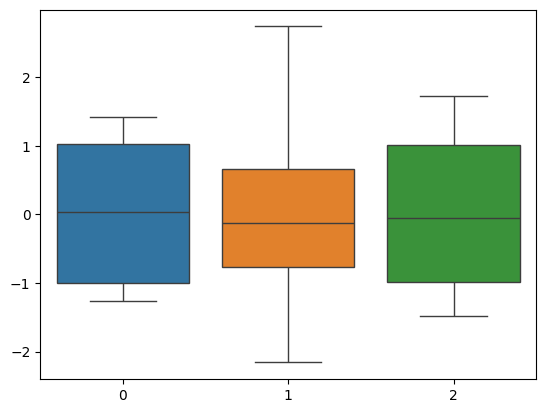

In [14]:
# see attached codes

# standardize the variables
scaler = StandardScaler()

features_scaled = scaler.fit_transform(features)

# checking for outliers
sns.boxplot(data=features_scaled)

#### C4: Clean Dataset

In [15]:


# Creating a DataFrame from the scaled features for convenience
features_scaled_df = pd.DataFrame(features_scaled, columns=['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'])


# Saving the cleaned dataset
cleaned_file_path = (r'C:\Users\Hien Ta\OneDrive\WGU\MSDA\D212\Task_1\churn_clean_After.csv')
features_scaled_df.to_csv(cleaned_file_path, index=False)


#### D1: Determining the Optimal Number of Clusters

To determine the optimal number of clusters in the dataset, the Elbow Method is commonly used. This method involves plotting the within-cluster sum of squares (WCSS) against the number of clusters. The "elbow" point in the plot, where the rate of decrease sharply changes, indicates the optimal number of clusters. This point is where adding more clusters does not significantly improve the fit of the model. The WCSS measures the variance within each cluster, and we aim to minimize it, but without having to use too many clusters.

The method for determining the optimal number of clusters is as follows:

a. Compute k-means clustering for a range of cluster values (e.g., 1 to 10).

b. For each solution, calculate the WCSS.

c. Plot the number of clusters against the WCSS.

d. Identify the "elbow" in the plot, where the WCSS begins to decrease more slowly.

Analytics Vidhya. (2021, January). In-depth Intuition of K-Means Clustering Algorithm in Machine Learning. 

#### D2: Code for Clustering Analysis Technique

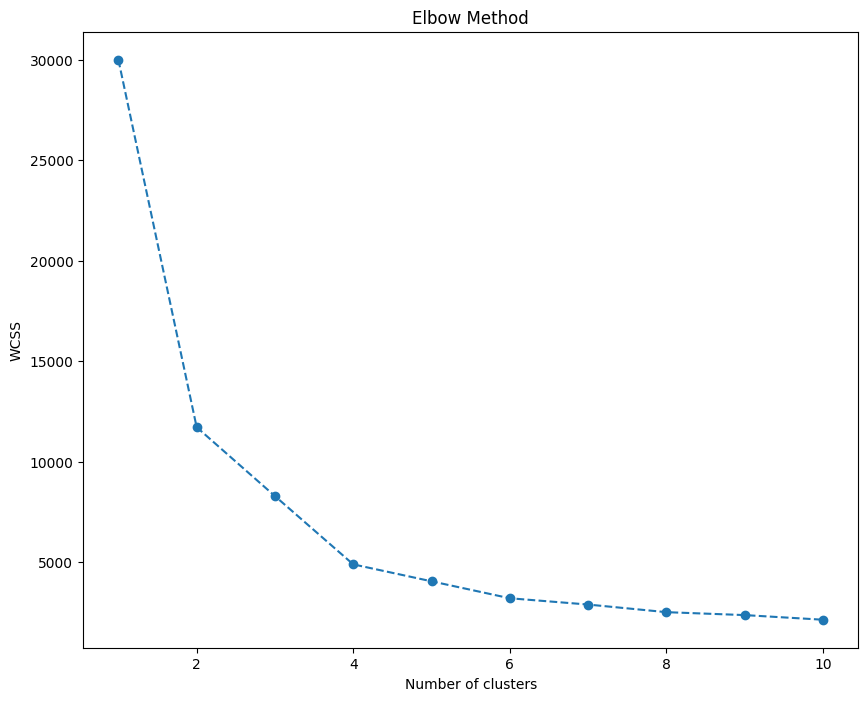

In [16]:
# see attached codes

# using features_scaled that I standardized in the above section
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
# Optimal number of clusters is found to be 4 based on the Elbow plot above.
optimal_clusters = 4
kmeans_final = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans_final.fit_predict(features_scaled)

# Add the cluster assignments back to the features_scaled_df
features_scaled_df['Cluster'] = y_kmeans

# Calculate the silhouette score using features_scaled that I standardized in the above section
silhouette_avg = silhouette_score(features_scaled, y_kmeans)
print("For n_clusters =", optimal_clusters, "The average silhouette_score is :", silhouette_avg)

# Save the DataFrame with the cluster for further analyzing the clustered data 
clustered_data_path = (r'C:\Users\Hien Ta\OneDrive\WGU\MSDA\D212\Task_1\churn_clean_Cluster.csv')
features_scaled_df.to_csv(clustered_data_path, index=False)


For n_clusters = 4 The average silhouette_score is : 0.4755168269101212


Explanation:

* The silhouette_score function computes the average silhouette coefficient of all samples, which is a measure of how similar an object is to its own cluster compared to other clusters. The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.
*    The silhouette_score requires at least two clusters to compute. A higher silhouette score indicates better-defined clusters.

#### E1: Quality of the Clusters Created

The clusters were assessed using visual inspection of scatter plots for the different pairings of the variables Tenure, MonthlyCharge, and Bandwidth_GB_Year against the cluster assignments. These visualizations indicated that the clusters were distinct with minimal overlap, suggesting a good quality of clustering. The distinct clusters likely represent varying customer profiles, such as long-term versus new customers, high versus low service usage, and differing levels of monthly spending.

#### E2: Implications of Clustering Analysis

The clustering analysis revealed four distinct customer segments within the telecommunications data. These segments can be characterized by differences in tenure, monthly charges, and bandwidth usage. This implies that the telecom company can develop targeted strategies for customer retention by addressing the specific needs and characteristics of each segment. For example, a segment of newer customers with lower usage might be targeted with special offers to increase their service usage and loyalty, while long-term, high-spending customers might be offered loyalty rewards or premium service options.

#### E3: Limitation

A key limitation of this analysis is the assumption of spherical clusters of similar size, inherent to the k-means clustering technique. This assumption may not hold true for all datasets, potentially impacting the accuracy of the clustering where the actual clusters may have different sizes and densities. Additionally, the analysis focused only on continuous variables, possibly overlooking insights from categorical variables that could further define customer segments.

#### E4: Recommendation

Based on the analysis results, it is recommended that the telecommunications company adopts a differentiated customer retention strategy tailored to the identified segments. For segments identified as at higher risk of churn, such as those with lower tenure and usage, targeted engagement strategies like personalized offers, enhanced customer support, and incentives for increased service usage may be effective. For segments showing high engagement and longer tenure, maintaining satisfaction through reliability, service quality, and loyalty rewards can further reduce churn rates. Implementing these strategies requires a nuanced understanding of each segment's needs and preferences, as derived from the clustering analysis.

#### F: Panopto Video

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=6fd3b6da-a9e4-47d3-be2b-b14701789de5

#### G: Sources

Analytics Vidhya. (2021, January). In-depth Intuition of K-Means Clustering Algorithm in Machine Learning. https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/

Scikit-learn developers. (n.d.). K-means. Scikit-learn: Machine Learning in Python. https://scikit-learn.org/stable/modules/clustering.html#k-means